In [ ]:
# Import all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import math
import random
import os
import time
from numpy import interp
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# Apply some Styles:

cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]
plt.style.use('ggplot')

In [ ]:
def seed_all(seed):
    
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42    
seed_all(seed)

x=144
y=123

In [ ]:
import pandas as pd
import io
train = pd.read_csv("heart.csv")
print(train)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  condition  
0        0   0     1          1  
1        0   0     

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

In [ ]:
train.nunique()

age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
num_major_vessels            5
thalassemia                  4
condition                    2
dtype: int64

In [ ]:
train['sex'] = train['sex'].map({0:'female',1:'male'})

train['chest_pain_type'] = train['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})

train['fasting_blood_sugar'] = train['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

train['rest_ecg'] = train['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

train['exercise_induced_angina'] = train['exercise_induced_angina'].map({0:'no',1:'yes'})

train['st_slope'] = train['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

train['thalassemia'] = train['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})

train['condition'] = train['condition'].map({0:'no_disease', 1:'has_disease'})

In [ ]:
categorical = [i for i in train.loc[:,train.nunique()<=10]]
continuous = [i for i in train.loc[:,train.nunique()>=10]]

In [ ]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

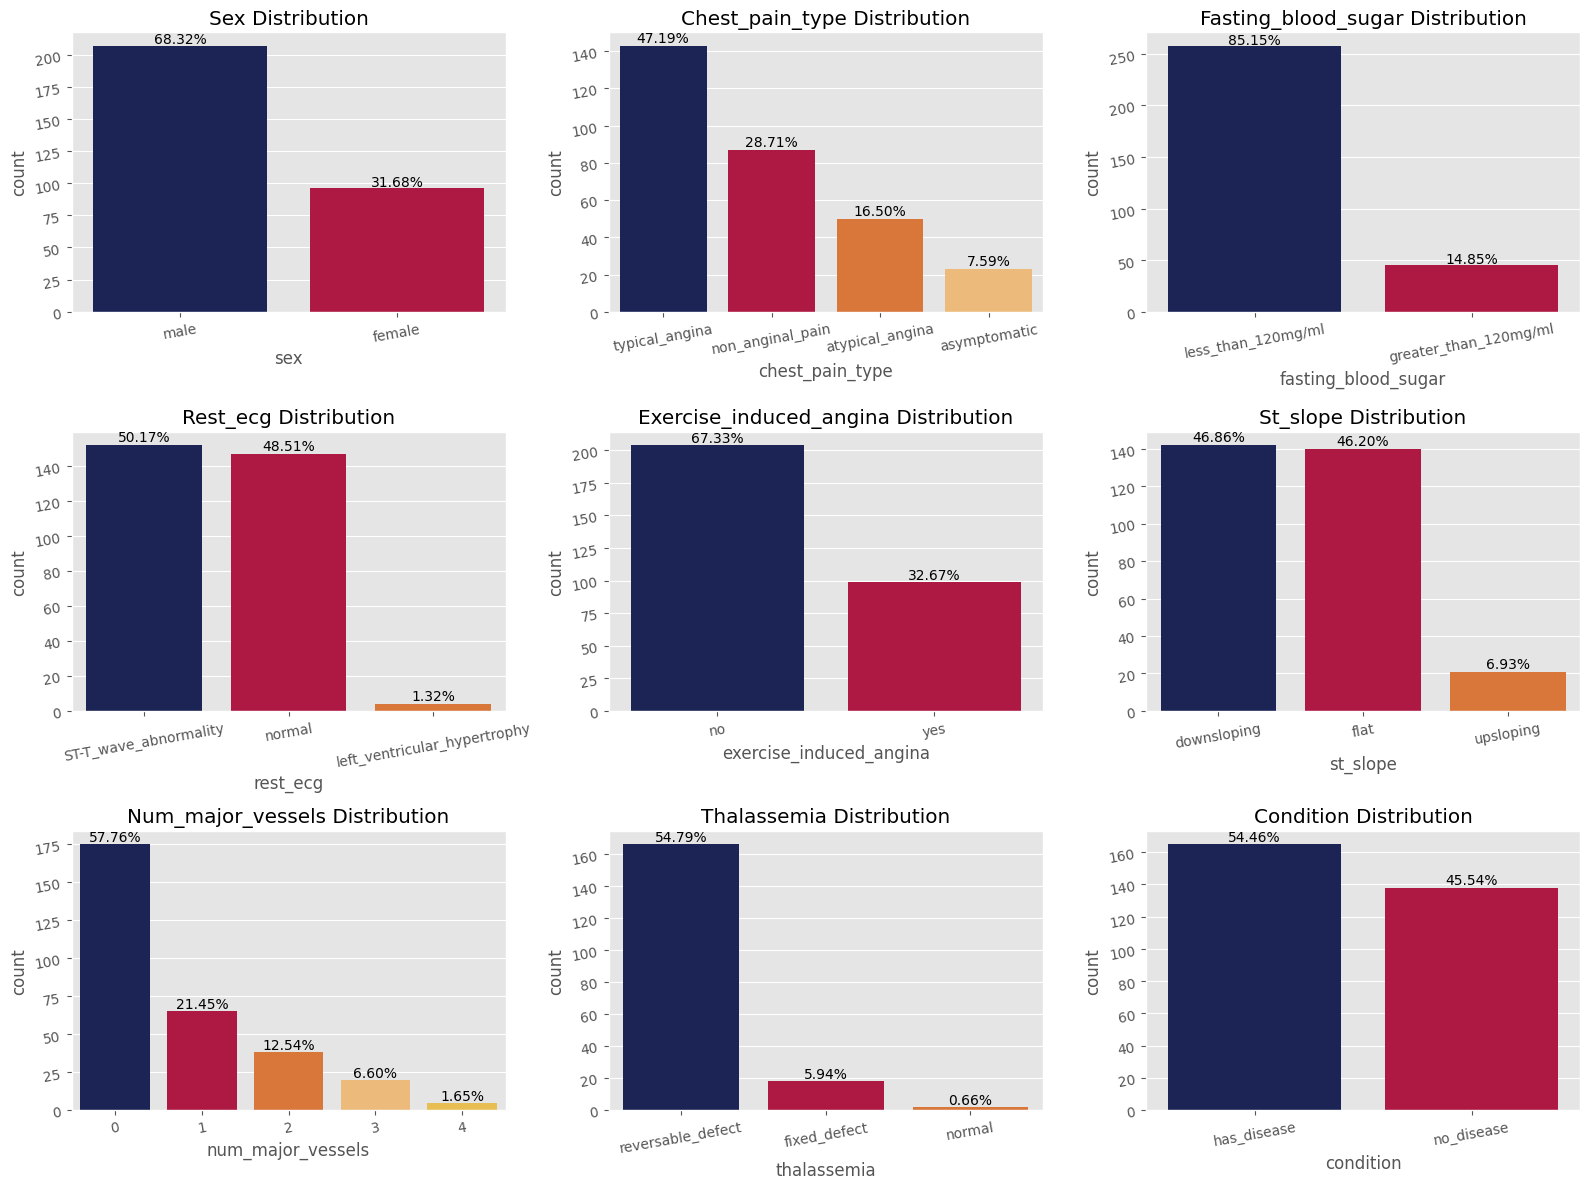

In [ ]:
ctg_dist(train, categorical)

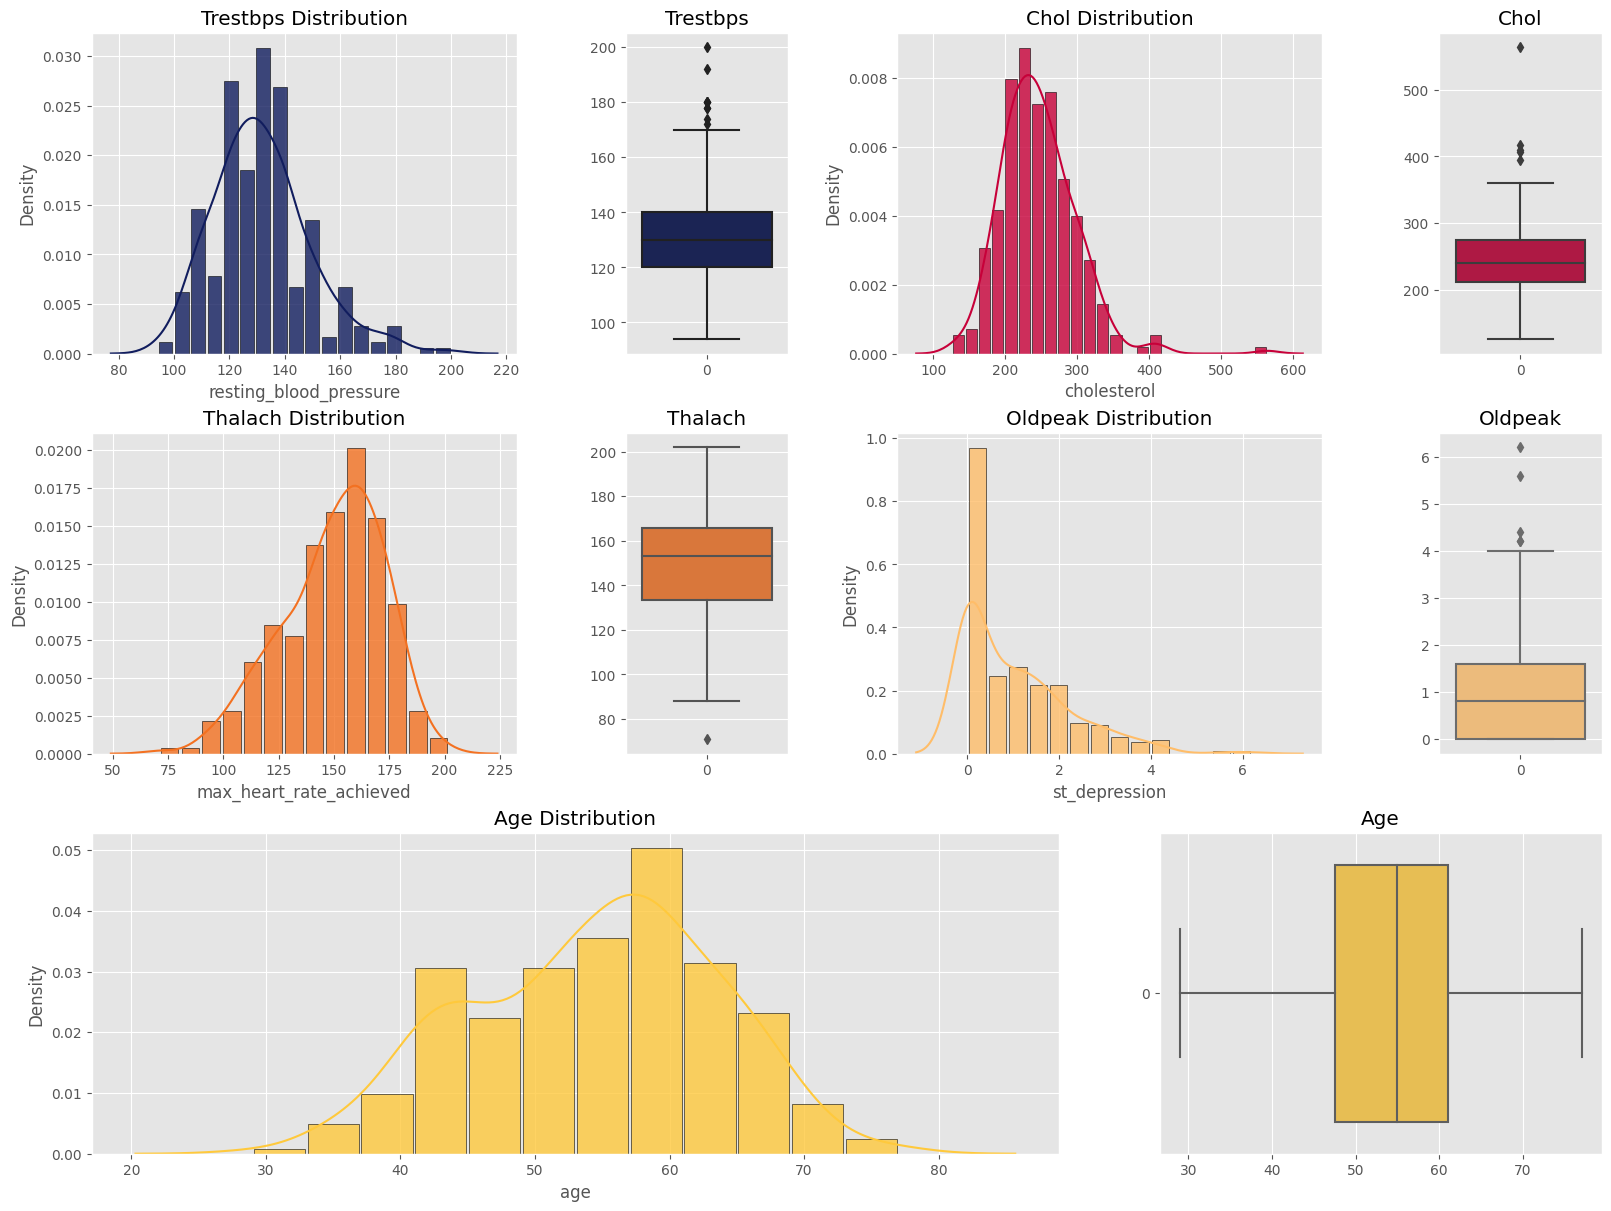

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(16, 12))

grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Trestbps Distribution')

sns.distplot(train[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('Trestbps')

sns.boxplot(train[continuous[1]], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])

ax2.set_title('Chol Distribution')

sns.distplot(train[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])

ax25.set_title('Chol')

sns.boxplot(train[continuous[2]], orient='v', color=cust_palt[1])

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('Thalach Distribution')

sns.distplot(train[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])

ax35 = fig.add_subplot(grid[1, 2:3])

ax35.set_title('Thalach')

sns.boxplot(train[continuous[3]], orient='v', color=cust_palt[2])

ax4 = fig.add_subplot(grid[1, 3:5])

ax4.set_title('Oldpeak Distribution')

sns.distplot(train[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])

ax45 = fig.add_subplot(grid[1, 5:])

ax45.set_title('Oldpeak')

sns.boxplot(train[continuous[4]], orient='v', color=cust_palt[3])

ax5 = fig.add_subplot(grid[2, :4])

ax5.set_title('Age Distribution')

sns.distplot(train[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])

ax55 = fig.add_subplot(grid[2, 4:])

ax55.set_title('Age')

sns.boxplot(train[continuous[0]], orient='h', color=cust_palt[4])

plt.show()

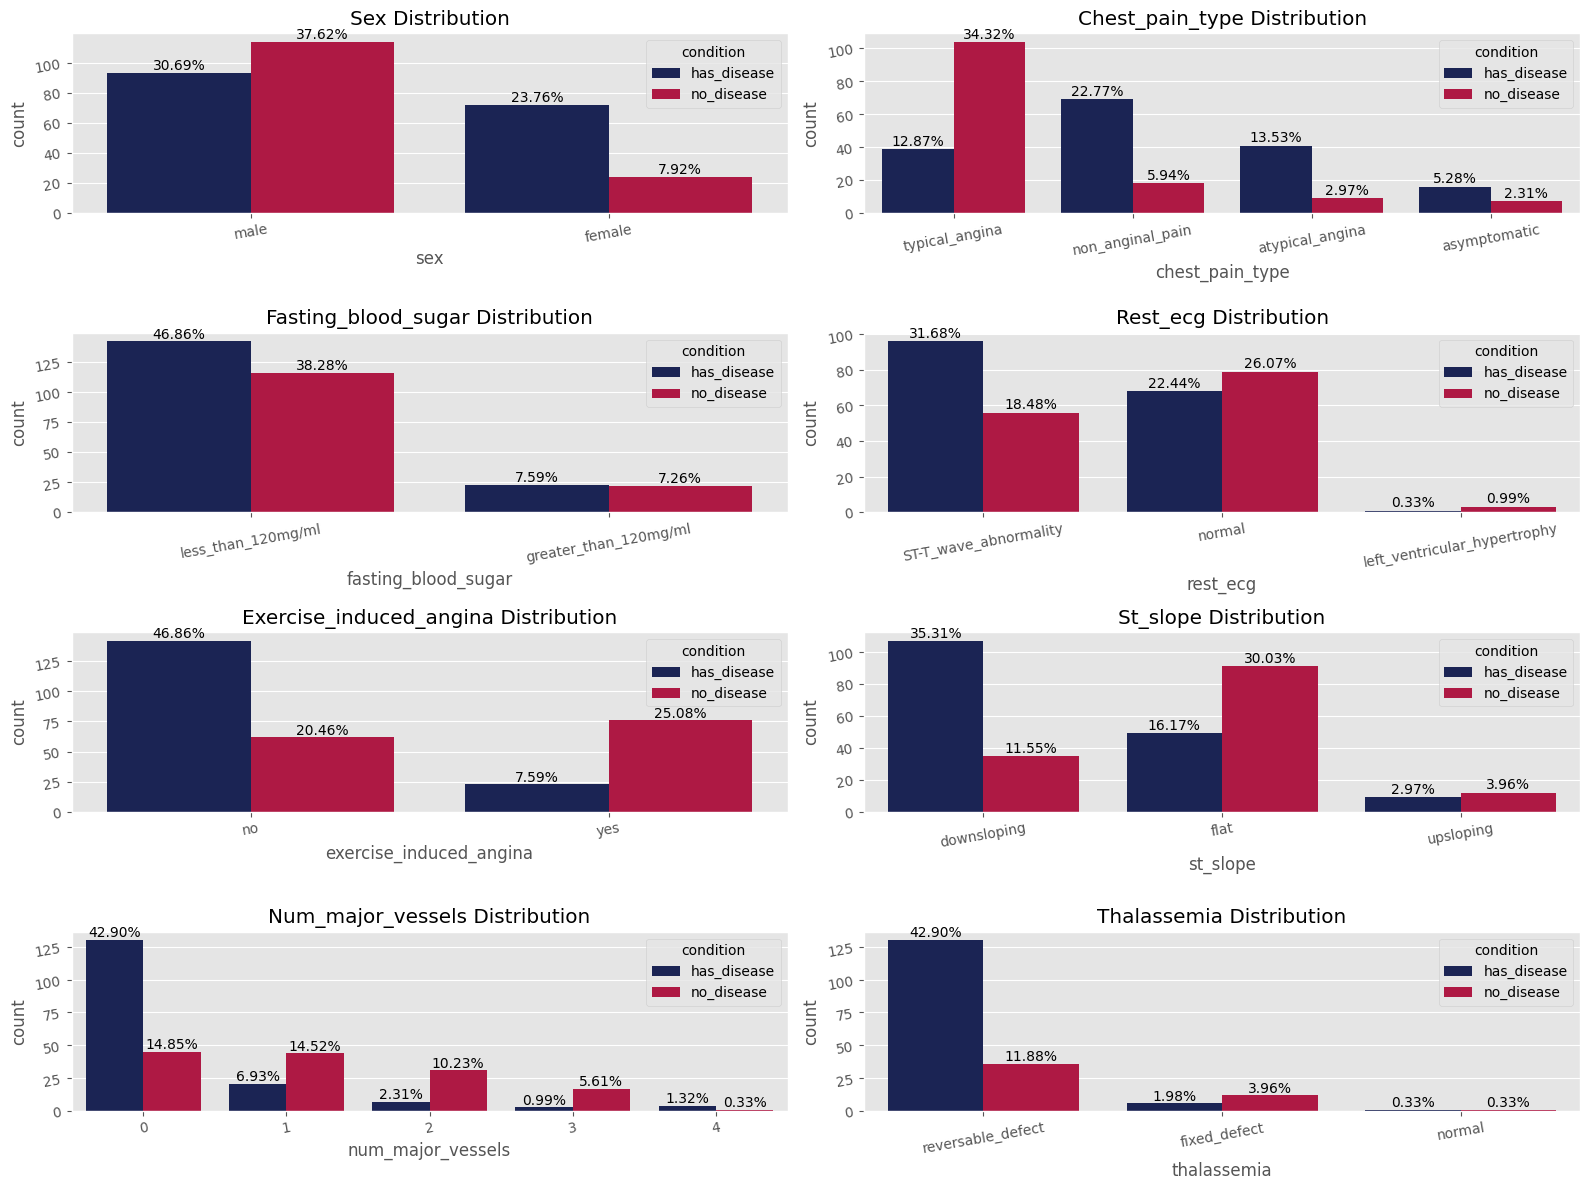

In [ ]:
ctg_dist(train, categorical[:-1], 'condition', 4, 2)

In [ ]:
heat_train = pd.read_csv('heart.csv')

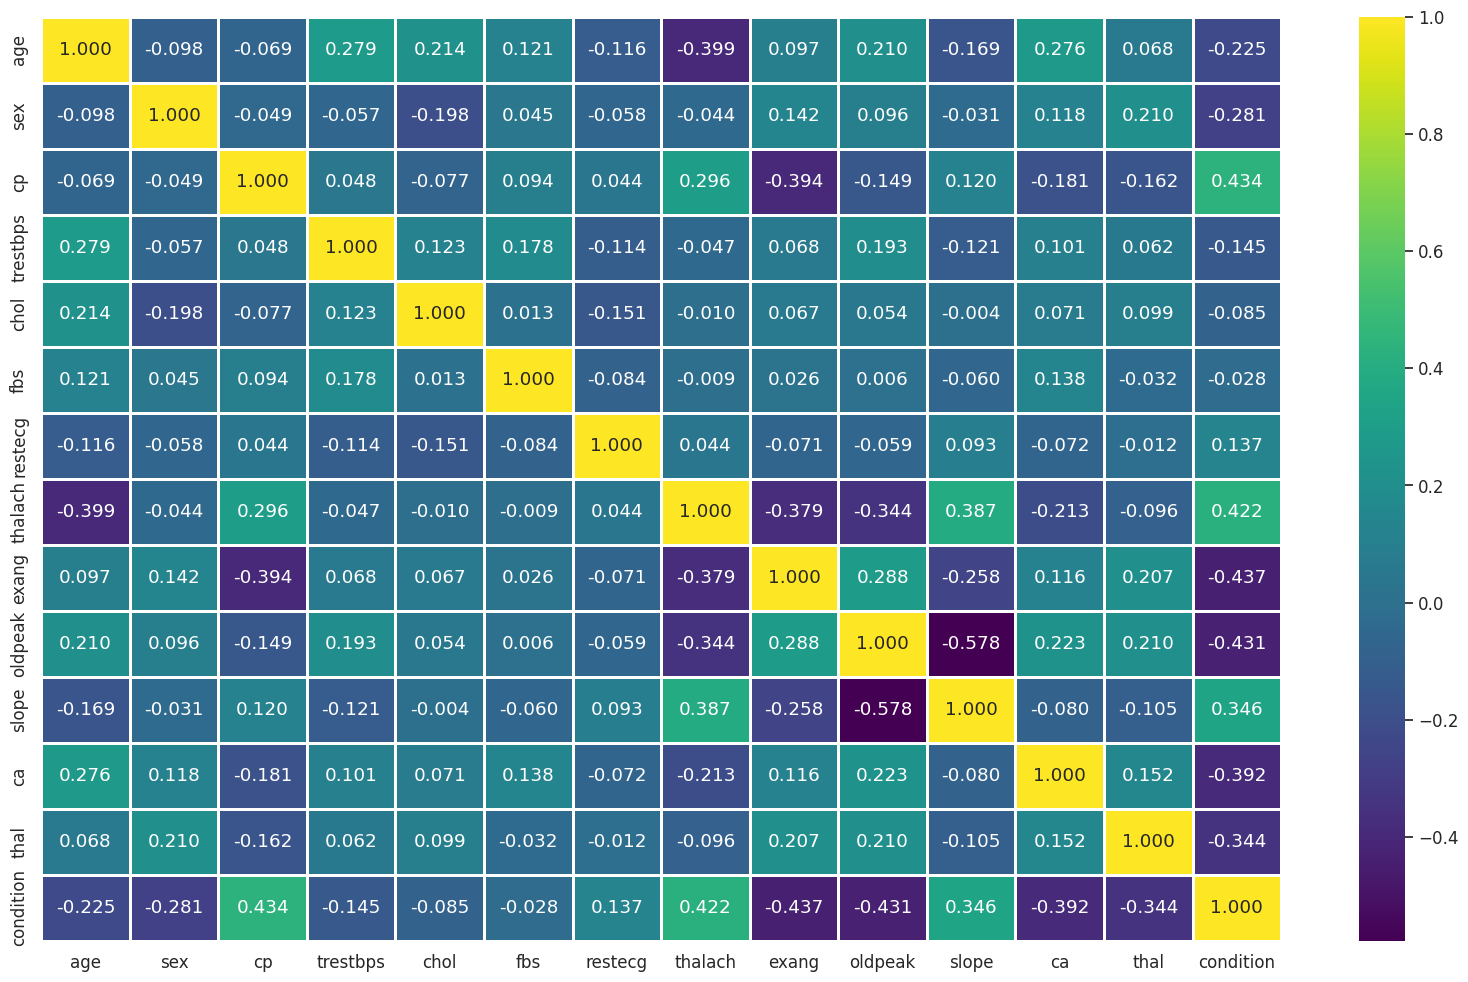

In [ ]:
# Correlation heatmap between variables and condition:
sns.set(font_scale=1.1)
correlation_train = heat_train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='viridis',
            linewidths=1,
            cbar=True)

plt.show()

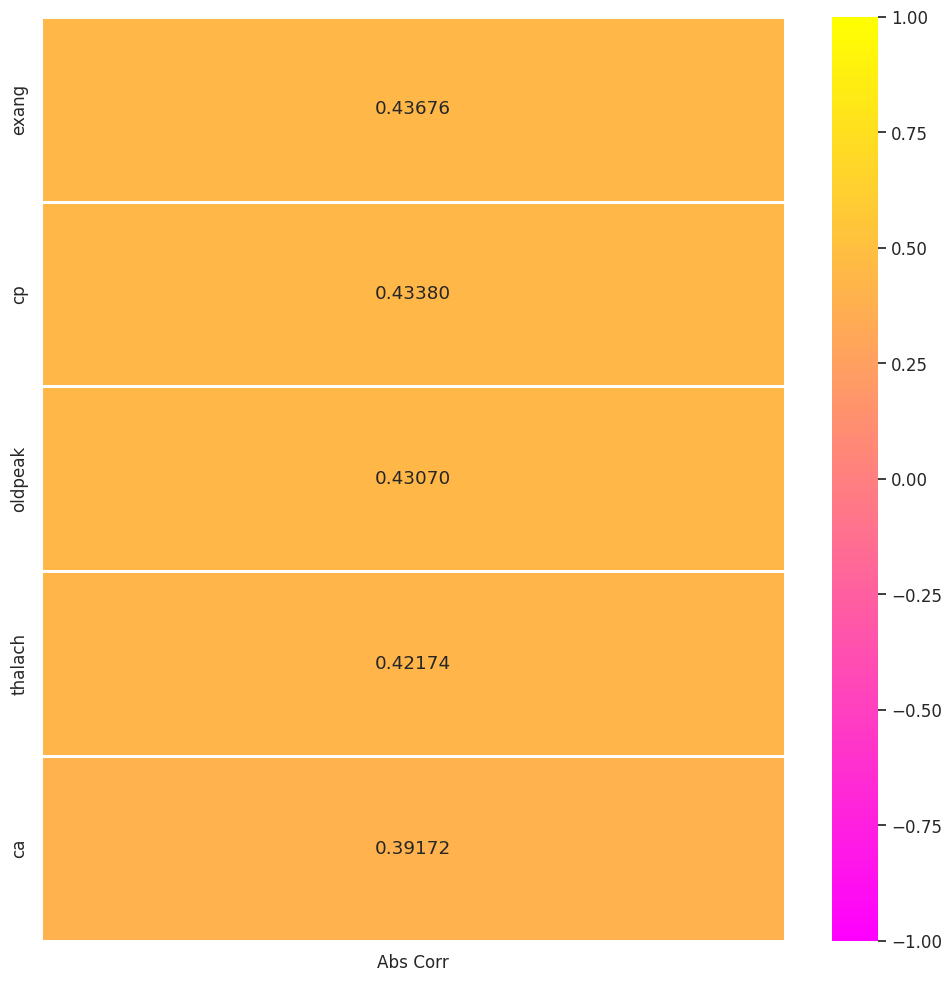

In [ ]:
correlations = heat_train.corrwith(heat_train['condition']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.35], cmap='spring', annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax);

In [ ]:
X = train.drop('condition', axis=1)
y = heat_train['condition']

In [ ]:
ctg_df = pd.get_dummies(data=train[['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia']])
X.drop(['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia'], axis=1, inplace=True)
X = pd.concat([X, ctg_df], axis=1)

In [ ]:
from sklearn.model_selection import cross_validate, KFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn import metrics

In [ ]:
knclass = KNeighborsClassifier()

dectree = DecisionTreeClassifier(random_state=seed)

svc = SVC()

randfclass = RandomForestClassifier(random_state=seed)

gsclass = GaussianNB()

In [ ]:
cv = KFold(5, shuffle=True, random_state=seed)

classifiers = [knclass, dectree, svc, randfclass,gsclass]

In [ ]:
def model_check(X, y, classifiers, cv):
    
    model_table = pd.DataFrame()

    row_index = 0
    for cls in classifiers:

        MLA_name = cls.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name
        
        cv_results = cross_validate(
            cls,
            X,
            y,
            cv=cv,
            scoring=('accuracy','f1','roc_auc'),
            return_train_score=True,
            n_jobs=-1
        )
        model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results[
            'train_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results[
            'test_roc_auc'].mean()
        model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
        model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results[
            'train_accuracy'].mean()
        model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results[
            'test_accuracy'].mean()
        model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
        model_table.loc[row_index, 'Train F1 Mean'] = cv_results[
            'train_f1'].mean()
        model_table.loc[row_index, 'Test F1 Mean'] = cv_results[
            'test_f1'].mean()
        model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1        

    model_table.sort_values(by=['Test F1 Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [ ]:
raw_models = model_check(X, y, classifiers, cv)

display(raw_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
3,RandomForestClassifier,1.000000,0.905593,0.029682,1.000000,0.831475,0.034664,1.000000,0.847947,0.027992,0.168222
4,GaussianNB,0.893298,0.858323,0.051020,0.815998,0.785464,0.045862,0.836326,0.807160,0.053222,0.004478
1,DecisionTreeClassifier,1.000000,0.776845,0.028428,1.000000,0.778798,0.023059,1.000000,0.799462,0.019614,0.005162
2,SVC,0.759426,0.731313,0.106884,0.665021,0.656448,0.067423,0.732524,0.721329,0.056617,0.006750
0,KNeighborsClassifier,0.845182,0.720570,0.051450,0.767306,0.673279,0.067152,0.791601,0.708466,0.070601,0.003246


In [ ]:
def f_imp(classifiers, X, y, bins):
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='spring')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Importances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()

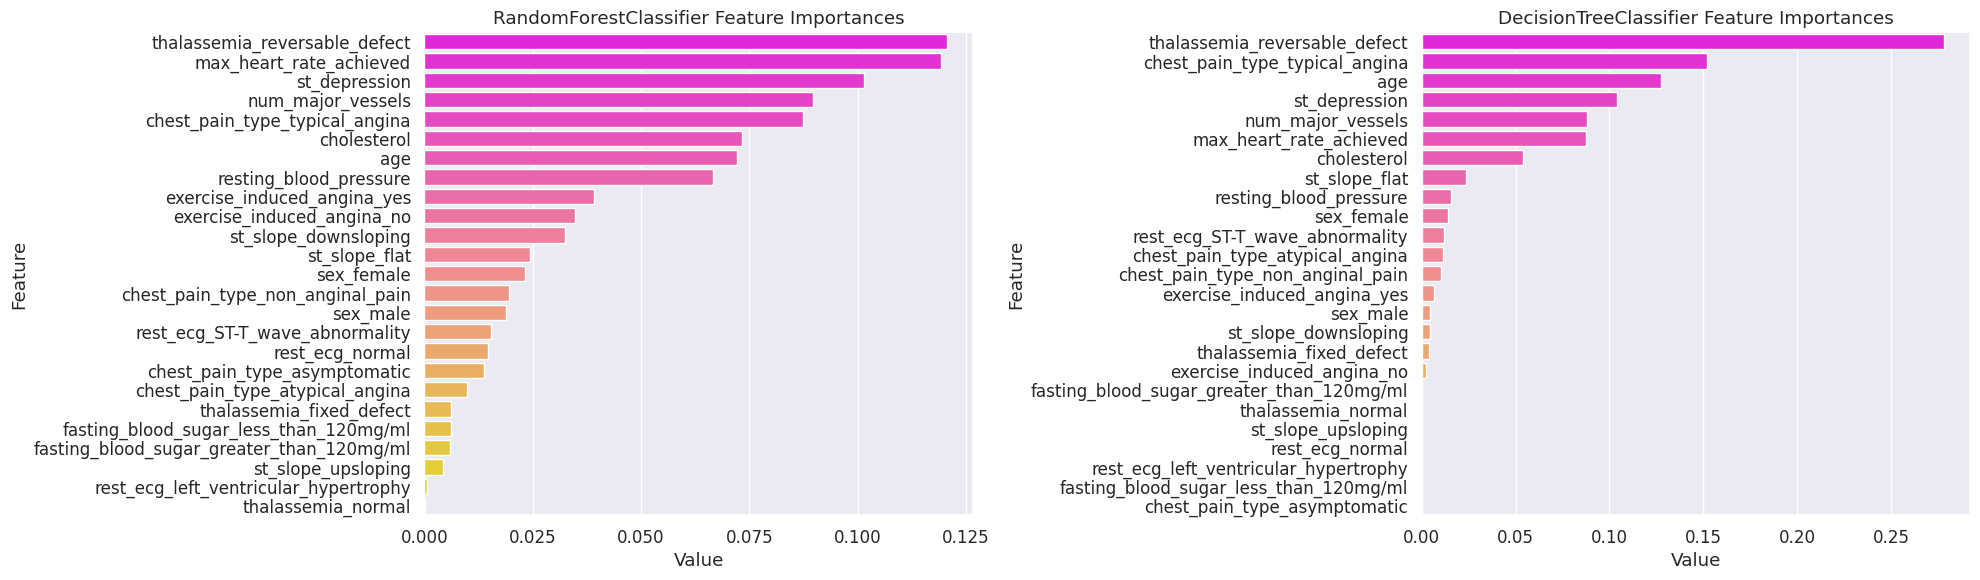

In [ ]:
# Feature importances:

f_imp([randfclass,dectree], X, y, 6)

In [ ]:
def kbin_cat(col, X, nbins=5):
    categorize = KBinsDiscretizer(n_bins = nbins, encode = 'onehot', strategy = 'kmeans')
    cat = categorize.fit_transform(X[col].values.reshape(-1,1))
    cat= pd.DataFrame(cat.toarray())
    cat_n = [f'cat_{str(i)}' for i in range(nbins)]
    cat.columns = [i.replace('cat',f'{str(col)}') for i in cat_n]
    cat = cat.astype('int')
    
    return cat

In [ ]:
rt = ['age','resting_blood_pressure','cholesterol', 'max_heart_rate_achieved','st_depression']
X_cat = X
for i in rt:    
    X_cat = X_cat.join(kbin_cat(i,X,5))
    X_cat.drop(i, axis=1, inplace=True)
print(X)
print(X_cat)

     age  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0     63                     145          233                      150   
1     37                     130          250                      187   
2     41                     130          204                      172   
3     56                     120          236                      178   
4     57                     120          354                      163   
..   ...                     ...          ...                      ...   
298   57                     140          241                      123   
299   45                     110          264                      132   
300   68                     144          193                      141   
301   57                     130          131                      115   
302   57                     130          236                      174   

     st_depression  num_major_vessels  sex_female  sex_male  \
0              2.3                  0           

In [ ]:
def prob_reg(X, y):
    
    from matplotlib.colors import ListedColormap
    figure = plt.figure(figsize=(20, 40))
    h = .02
    i = 1

    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Just plot the dataset first
    cm = plt.cm.RdYlGn
    cm_bright = ListedColormap(['#e00d14', '#3ca02c'])
    ax = plt.subplot(5, 2, i)

    # Iterate over classifiers
    for clf in classifiers:
        ax = plt.subplot(math.ceil(len(classifiers) / 2), 2, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        g = ax.scatter(X_train[:, 0],
                       X_train[:, 1],
                       c=y_train,
                       cmap=cm_bright,
                       edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c=y_test,
                   cmap=cm_bright,
                   edgecolors='k',
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

        ax.set_title(clf.__class__.__name__)

        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        plt.legend(handles=g.legend_elements()[0],
                   labels=['No Disease', 'Has Disease'],
                   framealpha=0.3,
                   scatterpoints=1)

        i += 1

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def conf_mat(X,y, classifiers):
    
    fig, axes = plt.subplots(5,1, figsize=(25,18))
    
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):
        classifier.fit(X,y)
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, classifier.predict(X)), 
                                      display_labels=['No Disease', 'Disease'])        
        disp.plot(cmap='Blues',ax=ax)                             
        ax.set_title(f'{classifier}')
        ax.grid(False)
        plt.tight_layout()

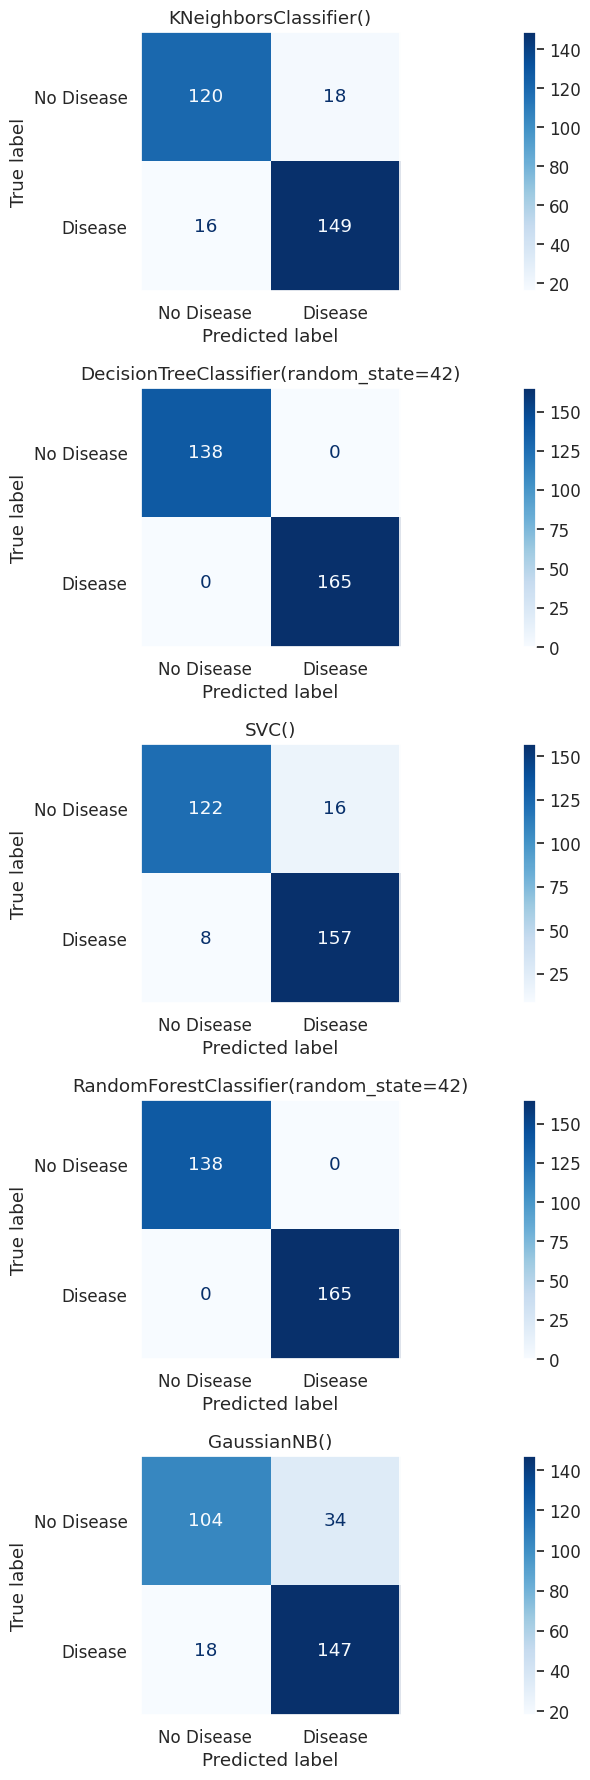

In [ ]:
conf_mat(X_cat, y,classifiers)

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X_cat,y, test_size=0.2, random_state=42)


svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

gnb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
knn_params = {'n_neighbors': [3, 5, 7, 9],
              'p': [1, 2]}

dtc_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}

rfc_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Create the classifiers
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB()
knn=KNeighborsClassifier()

# Create the GridSearchCV objects
svc_grid = GridSearchCV(svc, svc_params, scoring='accuracy', cv=5)
gnb_grid = GridSearchCV(gnb, gnb_params, scoring='accuracy', cv=5)
knn_grid = GridSearchCV(knn, knn_params, scoring='accuracy', cv=5)
dtc_grid = GridSearchCV(dtc, dtc_params, scoring='accuracy', cv=5)
rfc_grid = GridSearchCV(rfc, rfc_params, scoring='accuracy', cv=5)

# Fit the GridSearchCV objects to the data
svc_grid.fit(X_train, y_train)
gnb_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
dtc_grid.fit(X_train, y_train)
rfc_grid.fit(X_train, y_train)
best_dtc = dtc_grid.best_estimator_
best_rfc = rfc_grid.best_estimator_
best_svc = svc_grid.best_estimator_
best_gnb = gnb_grid.best_estimator_
best_knn=  knn_grid.best_estimator_
# Use the best model to make predictions on the test data
y_pred = best_svc.predict(X_test)
y_pred1 = best_gnb.predict(X_test)
y_pred2= best_knn.predict(X_test)
y_pred3 = best_dtc.predict(X_test)
y_pred4 = best_rfc.predict(X_test)

# Calculate the accuracy of the best model on the test data
accuracy = accuracy_score(y_test, y_pred)
accuracy1  = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy4  = accuracy_score(y_test, y_pred4)









# Print the best hyperparameters and corresponding scores for each classifier
print("Best hyperparameters for SVC: ", svc_grid.best_params_)
print("Best score for SVC: ", svc_grid.best_score_)
print("Accuracy score for SVC: ",accuracy)
print("\n")
print("Best hyperparameters for Gaussian NB: ", gnb_grid.best_params_)
print("Best score for Gaussian NB: ", gnb_grid.best_score_)
print("Accuracy score for Gaussian NB: ",accuracy1)
print("\n")
print("Best hyperparameters for KNN: ", knn_grid.best_params_)
print("Best score for KNN: ", knn_grid.best_score_)
print("Accuracy score for KNN: ",accuracy2)
print("\n")
print("Best hyperparameters for Decision Tree: ", dtc_grid.best_params_)
print("Best score for Decision Tree: ", dtc_grid.best_score_)
print("Accuracy score for Decision Tree: ",accuracy3)
print("\n")
print("Best hyperparameters for Random Forest: ", rfc_grid.best_params_)
print("Best score for Random Forest: ", rfc_grid.best_score_)
print("Accuracy score for Random Forest: ",accuracy4)

Best hyperparameters for SVC:  {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC:  0.8263605442176871
Accuracy score for SVC:  0.8688524590163934


Best hyperparameters for Gaussian NB:  {'var_smoothing': 1e-05}
Best score for Gaussian NB:  0.7847789115646259
Accuracy score for Gaussian NB:  0.7868852459016393


Best hyperparameters for KNN:  {'n_neighbors': 5, 'p': 2}
Best score for KNN:  0.8139455782312925
Accuracy score for KNN:  0.8360655737704918


Best hyperparameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Best score for Decision Tree:  0.7851190476190475
Accuracy score for Decision Tree:  0.8032786885245902


Best hyperparameters for Random Forest:  {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 200}
Best score for Random Forest:  0.846938775510204
Accuracy score for Random Forest:  0.8852459016393442
